In [ ]:
!pip install pandas networkx matplotlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##### Let's load in the datasets

In [ ]:
df = pd.read_csv('/content/SOCIAL_NETWORK  - Sheet1.csv')

In [ ]:
df.head()

,Employee Name,Supervisor Name
0,Alice Johnson,Sarah Smith
1,Bob Brown,John Doe
2,Carol White,Sarah Smith
3,David Green,John Doe
4,Emma Davis,Sarah Smith


In [ ]:
graph = nx.from_pandas_edgelist(df, 'Employee Name', 'Supervisor Name', create_using=nx.DiGraph())

In [ ]:
# Get the number of nodes and edges.
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 119
Number of edges: 118


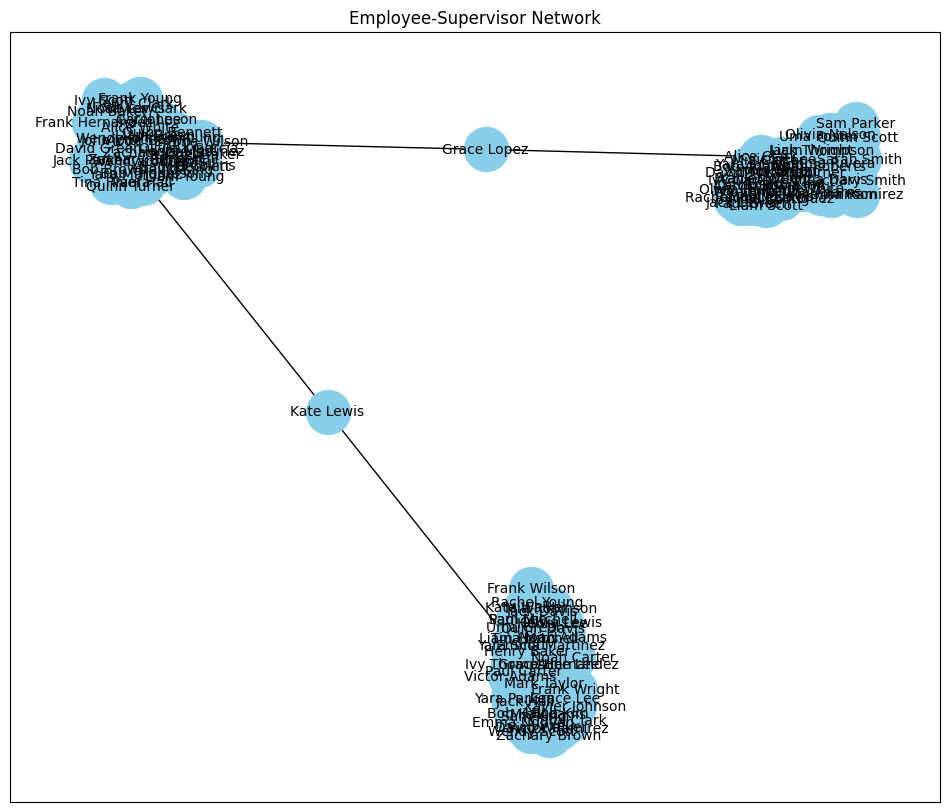

In [ ]:
# Plot the graph with increased figure size.
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(graph)

# Draw nodes and edges separately.
nx.draw_networkx_nodes(graph, pos, node_size=1000, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, arrows=True, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(graph, pos, font_size=10)

plt.title('Employee-Supervisor Network')
plt.show()

In [ ]:
top = pd.DataFrame()
top['Weighted Degree'] = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality']).sort_values(by='Degree Centrality', ascending=False)

# Calculate PageRank, Closeness and Betweenness Centrality
page_rank = nx.pagerank(graph)
closeness = nx.closeness_centrality(graph)
betweenness = nx.betweenness_centrality(graph)

# Add the new metrics to the DataFrame
top['Page Rank'] = pd.DataFrame.from_dict(page_rank, orient='index', columns=['Page Rank'])
top['Closeness'] = pd.DataFrame.from_dict(closeness, orient='index', columns=['Closeness'])
top['Betweenness'] = pd.DataFrame.from_dict(betweenness, orient='index', columns=['Betweenness'])

top.head()

,Weighted Degree,Page Rank,Closeness,Betweenness
Sarah Smith,0.338983,0.158884,0.338983,0.0
Mark Taylor,0.330508,0.154978,0.330508,0.0
John Doe,0.330508,0.153025,0.330508,0.0
Grace Lopez,0.016949,0.004596,0.000000,0.0
Kate Lewis,0.016949,0.004596,0.000000,0.0
